<a href="https://colab.research.google.com/github/taeyoni/today-I-learned/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
df = pd.read_csv('/content/drive/MyDrive/Dart_b-data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Embarked'>

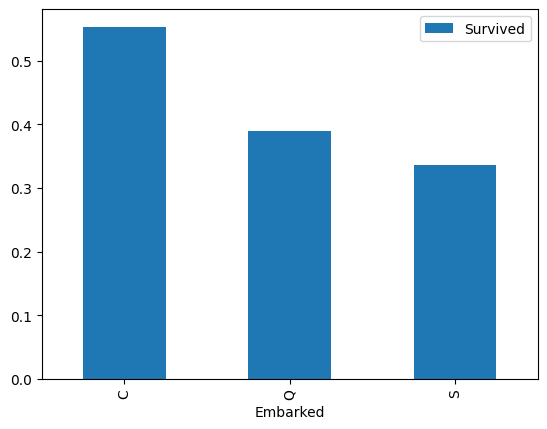

In [58]:
# 인코딩 할 범주형 _ sex, embarked
# sex-0.1 /embarked-생존여부와 관련성이 있는가 => 위계질서 있는가
#embarked scq의 각 개수
df['Embarked'].value_counts()

#embarked - 생존 여부 확인
#emarked별 생존 평균 내기
df2 = df[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar()
df2

In [60]:
#C,Q,S 순으로 생존율 차이 유.
#순서대로 0,1,2로 범주형 -> 순서형 변환

df['Sex']=df['Sex'].replace(['male', 'female'], [0,1])
df['Embarked']=df['Embarked'].replace(['C', 'Q', 'S'], [0,1,2])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0


<Axes: >

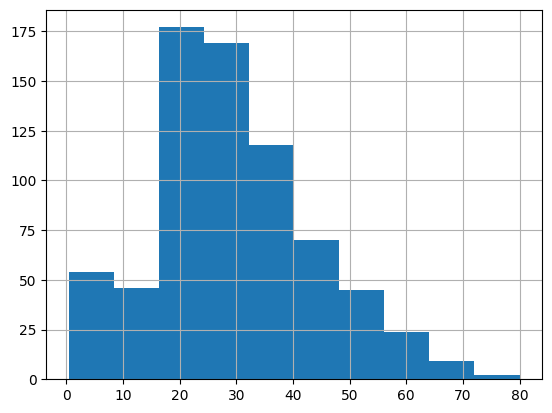

In [61]:
df['Age'].hist()

<Axes: >

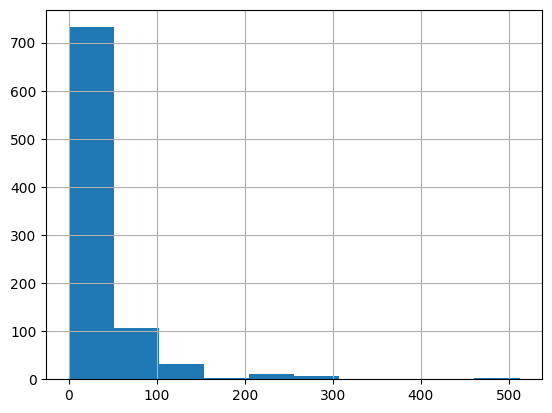

In [62]:
df['Fare'].hist()
#왜도문제

<Axes: >

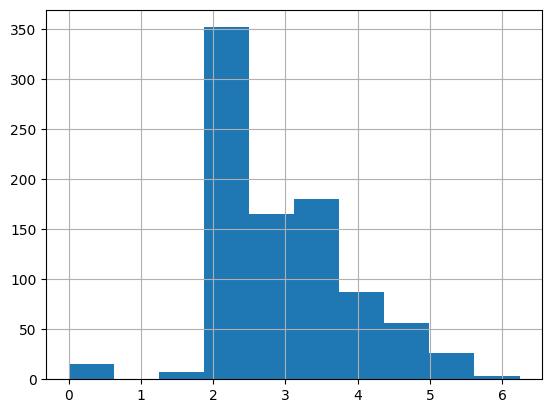

In [63]:
#로그변환
import numpy as np

df['Fare'] = df['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df['Fare'].hist()

In [41]:
#피쳐선택
#ID,NAME,Ticket,Cabin제외
#Pclass,Sex,Embarked/Age,Fare구간나누기
#SibSp,Parch가족수
#Survived종속변수



In [64]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [65]:
#Age 구간 나누기
df['Age_band'] = 0
df.loc[df['Age']<=16, 'Age_band'] = 0
df.loc[(df['Age']>16)&(df['Age']<=32), 'Age_band'] = 1
df.loc[(df['Age']>32)&(df['Age']<=48), 'Age_band'] = 2
df.loc[(df['Age']>48)&(df['Age']<=64), 'Age_band'] = 3
df.loc[(df['Age']>64), 'Age_band'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,2.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,2.0,2


In [66]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,2.0,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,0.0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2.0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,2.0,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,2.0,2,1


In [67]:
#로그변환한 Fare 구간 나누기
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
df['Fare_Range'].unique()

[(-0.001, 2.068], (3.434, 6.239], (2.068, 2.671], (2.671, 3.434]]
Categories (4, interval[float64, right]): [(-0.001, 2.068] < (2.068, 2.671] < (2.671, 3.434] <
                                           (3.434, 6.239]]

In [68]:
# Fare_cat
df['Fare_cat'] = 0
df.loc[df['Fare']<=2.068, 'Fare_cat'] = 0
df.loc[(df['Fare']>2.068)&(df['Fare']<=2.671), 'Fare_cat'] = 1
df.loc[(df['Fare']>2.671)&(df['Fare']<=3.434), 'Fare_cat'] = 2
df.loc[(df['Fare']>3.434)&(df['Fare']<=6.239), 'Fare_cat'] = 3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,FamilySize,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,2.0,1,2,"(-0.001, 2.068]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,0.0,2,2,"(3.434, 6.239]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2.0,1,1,"(2.068, 2.671]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,2.0,2,2,"(3.434, 6.239]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,2.0,2,1,"(2.068, 2.671]",1
